In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/com_network-fc_secondRun.joins  
  inflating: __MACOSX/data/._com_network-fc_secondRun.joins  
  inflating: data/zachary-fc_secondRun.joins  
  inflating: __MACOSX/data/._zachary-fc_secondRun.joins  
  inflating: data/email-Eu-core.txt  
  inflating: __MACOSX/data/._email-Eu-core.txt  
  inflating: data/gplus.txt          
  inflating: __MACOSX/data/._gplus.txt  
  inflating: data/moreno_blogs_blogs.txt  
  inflating: __MACOSX/data/._moreno_blogs_blogs.txt  
  inflating: data/foodweb-baywet.txt  
  inflating: __MACOSX/data/._foodweb-baywet.txt  
  inflating: data/lesmis-fc_secondRun.hist  
  inflating: __MACOSX/data/._lesmis-fc_secondRun.hist  
  inflating: data/inf-USAir97.txt    
  inflating: __MACOSX/data/._inf-USAir97.txt  
  inflating: data/com_network-fc_secondRun.hist  
  inflating: __MACOSX/data/._com_network-fc_secondRun.hist  
  inflating: data/Uetz_screen.txt    
  inflating: __MACO

**Questao 1** Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau. Considere o maior componente conectado.

In [ ]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
G = nx.read_gml("data/lesmis.gml") # Read the network

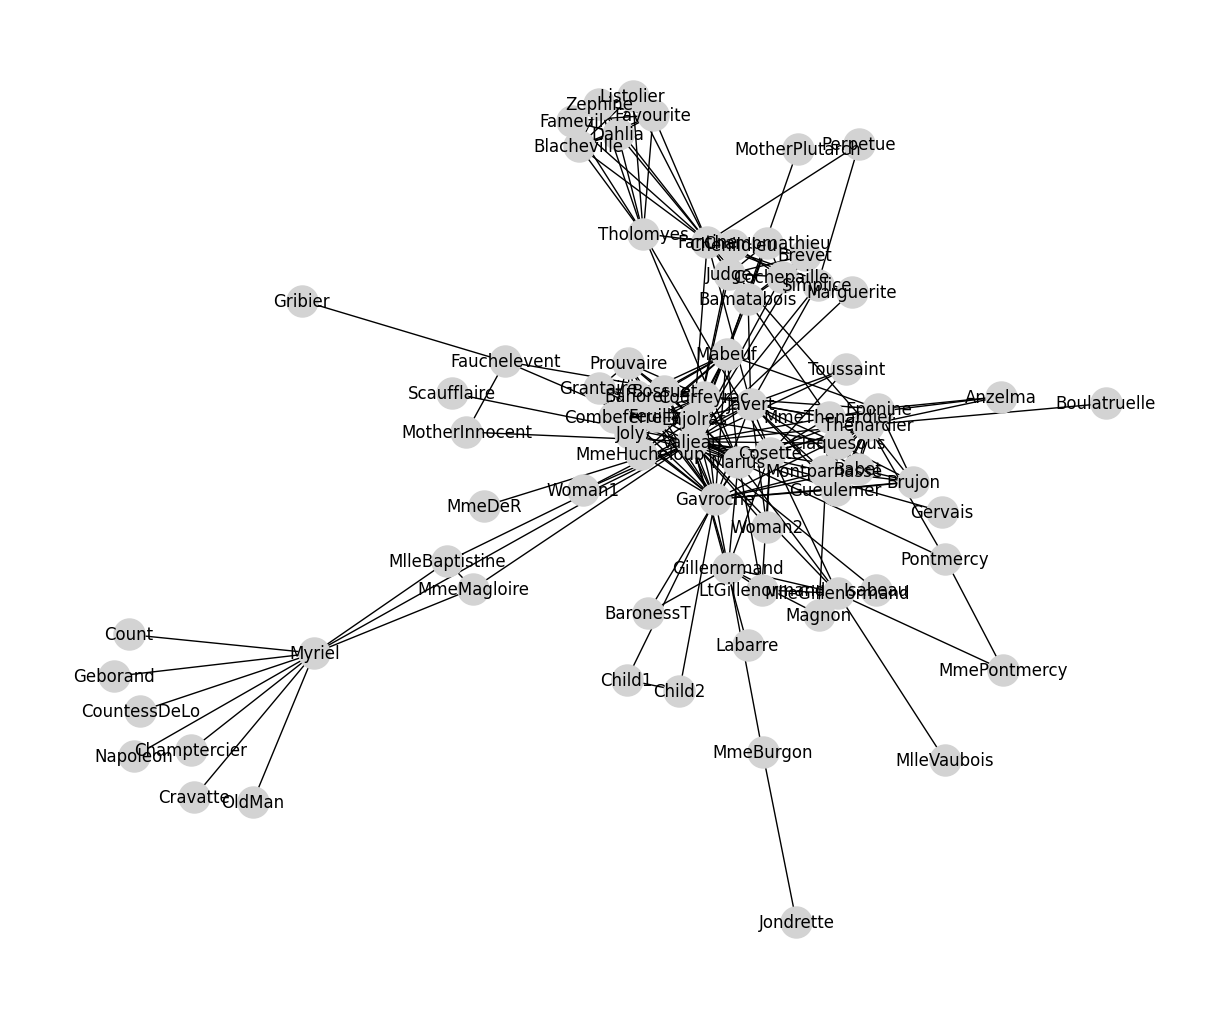

In [ ]:
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

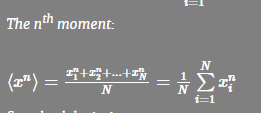

In [ ]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('Terceiro momento de k:', momment(G,3))
print('Terceiro momento de k:', momment(G,4))

Terceiro momento de k: 1408.025974025974
Terceiro momento de k: 33592.72727272727


**Questao 2** Implemente uma rotina para calcular a medida de complexidade. Qual o valor da complexidade para a rede de energia elétrica dos EUA (Base powergrid).

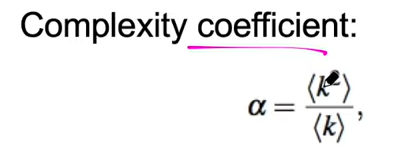

In [ ]:
file = open("/content/data/powergrid.txt")
content = file.read()
print(content)

1 2
1 3
1 4
2 428
2 435
2 436
2 437
2 438
3 432
3 458
3 459
3 460
4 478
4 523
5 6
5 7
5 8
5 9
6 3644
6 3680
7 3397
8 3397
9 3751
9 3830
10 11
11 3454
11 3535
12 13
13 4935
13 4936
14 15
15 115
15 119
15 125
15 171
15 173
15 174
15 175
16 17
16 18
17 32
17 33
17 34
17 35
18 47
19 20
20 21
20 22
22 23
22 24
22 25
22 26
22 27
23 28
24 131
24 132
25 106
26 28
26 67
26 131
26 198
26 205
26 226
27 31
28 61
29 30
29 31
30 59
30 60
30 99
30 177
30 178
30 179
31 67
33 36
33 37
33 38
33 39
35 96
35 167
38 44
38 68
39 117
40 41
40 42
41 43
41 44
42 190
43 45
45 163
45 245
45 255
46 47
46 48
47 111
48 65
49 50
50 110
50 127
51 52
52 55
52 153
52 168
52 530
52 540
53 54
53 55
54 116
55 127
55 168
55 218
55 4523
56 57
56 58
57 93
57 95
57 128
58 222
59 60
59 61
59 62
60 61
61 71
61 226
63 64
63 65
64 231
66 67
67 94
67 126
67 154
67 166
67 184
67 185
69 70
69 71
70 71
70 107
70 177
70 210
71 84
71 189
71 196
71 226
72 73
72 74
73 130
74 77
74 193
75 76
75 77
76 130
77 177
77 235
78 79
79 80
79 81
80

In [ ]:
G = nx.read_edgelist("/content/data/powergrid.txt")

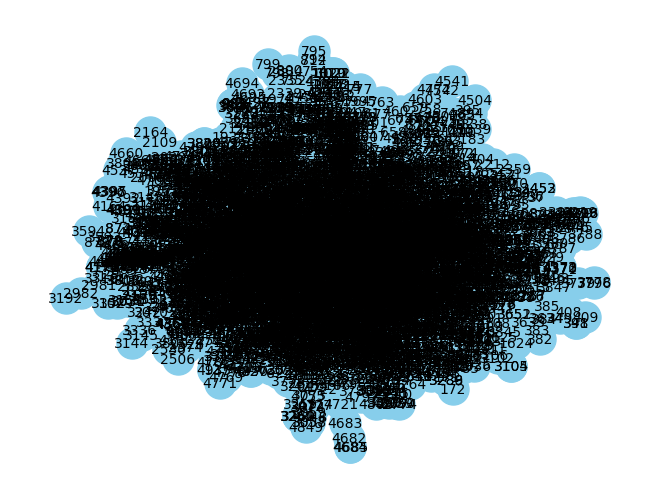

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.show()

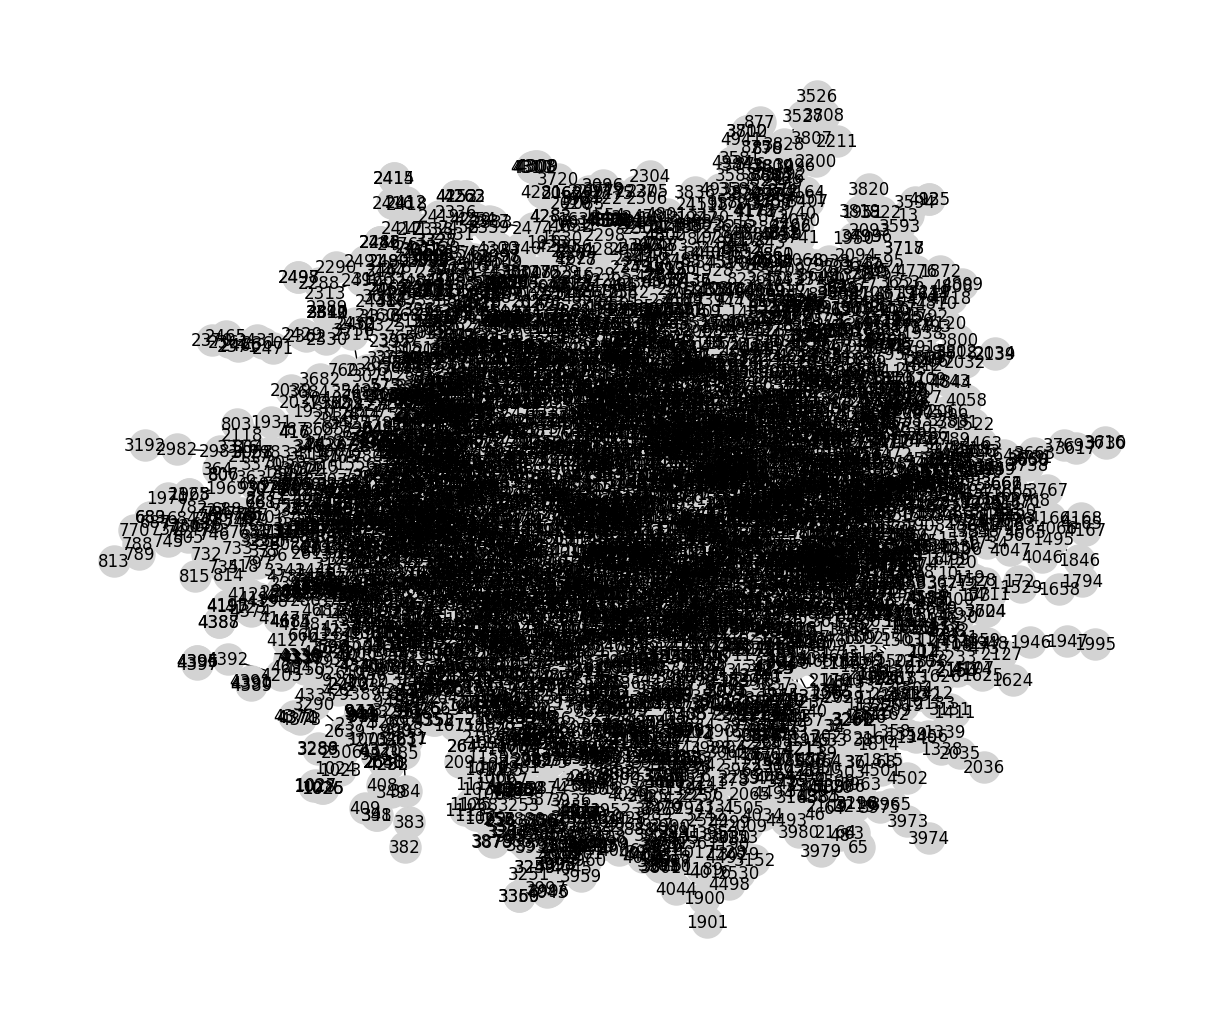

In [ ]:
G=nx.read_edgelist("/content/data/powergrid.txt", nodetype=int)
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [ ]:
def complexity(G):
    # calcular o segundo momento do grau
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**2
    M = M/N
    # calcular o grau medio
    vk = dict(G.degree()).values()
    vk = np.array(list(vk))
    md = mean(vk)
    return M/md

print('Complexidade:', complexity(G))

Complexidade: 3.8712465878070974


**Questao 3** Implemente uma rotina para calcular a entropia de Shannon e calcule essa medida para a base de estradas da Europa (base euroroad).

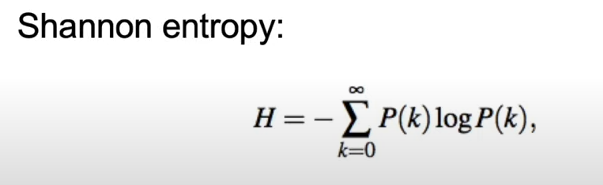

In [ ]:
G= nx.read_edgelist("/content/data/euroroad.txt")

In [ ]:
import math

def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  2.4552


**Questao 4** Calcule as medidas transitivity e average clustering coefficient para a base de dados de aeroportos do EUA (base usairport.txt).

In [ ]:
#file = open('/content/data/usairport.txt')
#content = file.read()
#print(content)

In [ ]:
G_airport = nx.read_weighted_edgelist("/content/data/usairport.txt")

CC = (nx.transitivity(G_airport))
print("Transitivity = ","%3.4f"%CC)

avc = nx.average_clustering(G_airport)
print("Average clustering:", "%3.4f"%avc)

Transitivity =  0.3841
Average clustering: 0.5042


**Questao 5** Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport.txt).

In [ ]:
H = shannon_entropy(G_airport)
print("Shannon Entropy = ", "%3.4f"%H)

compl = complexity(G_airport)
print("Complexity:", "%3.4f"%compl)

Shannon Entropy =  4.9860
Complexity: 112.2222
